# Análise Exploratória de dados de Fundos Imobiliários

## Elaboração de relatório da a partir da base de dados do portal [Fundamentos](https://www.fundamentus.com.br/)

In [1]:
# imports das bibliotecas

import pandas as pd
import mplcyberpunk
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter, EngFormatter

plt.style.use("cyberpunk")

In [33]:
# Carregando a base de dados baixada
url_aquivo = "./data/report_20250201_135136.csv"
table = pd.read_csv(url_aquivo, sep=";")
table

,PAPEL,SEGMENTO,COTACAO,FFO_YIELD,DIVIDEND_YIELD,P_VP,VALOR_DE_MERCADO,LIQUIDEZ,QTD_DE_IMOVEIS,PRECO_DO_M2,ALUGUEL_POR_M2,CAP_RATE,VACANCIA_MEDIA
0,AAZQ11,Títulos e Val. Mob.,6.79,0.2110,0.1879,0.79,163213000.0,643927.0,0,0.00,0.00,0.0000,0.0000
1,ABCP11,Shoppings,74.52,0.0957,0.0925,0.69,350921000.0,56830.0,1,4905.33,571.37,0.1165,0.1182
2,AEFI11,Outros,174.90,0.0904,0.0000,1.56,411893000.0,0.0,7,0.00,398.61,0.0000,0.0000
3,AFCR11,Híbrido,103.15,0.1093,0.0000,1.09,498867000.0,0.0,0,0.00,0.00,0.0000,0.0000
4,AFHI11,Títulos e Val. Mob.,87.92,0.1069,0.1276,0.96,400530000.0,1237150.0,0,0.00,0.00,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,YUFI11,Residencial,59.52,0.0498,0.0487,0.56,29322500.0,19.0,40,1437.34,224.64,0.1563,0.0000
494,ZAGH11,Híbrido,10.70,0.0289,0.0579,1.14,95140800.0,3309.0,0,0.00,0.00,0.0000,0.0000
495,ZAVC11,Títulos e Val. Mob.,9.50,0.0712,0.1163,0.96,29424800.0,42.0,0,0.00,0.00,0.0000,0.0000
496,ZAVI11,Híbrido,86.25,0.1759,0.1764,0.65,101199000.0,507495.0,10,1364.79,207.27,0.1519,0.0068


### Distribuição de frequência dos segmentos dos Fundos Listados

In [3]:
# frequêncnia de papéis por tipo de segmento

frequencia = table['SEGMENTO'].value_counts()
frequencia

SEGMENTO
Títulos e Val. Mob.    175
Híbrido                125
Outros                  54
Lajes Corporativas      54
Logística               35
Shoppings               26
Residencial             22
Hospital                 4
Hotel                    3
Name: count, dtype: int64

In [4]:
# Frequência relativa

frequencia_relativa = table['SEGMENTO'].value_counts(normalize=True)*100
frequencia_relativa

SEGMENTO
Títulos e Val. Mob.    35.140562
Híbrido                25.100402
Outros                 10.843373
Lajes Corporativas     10.843373
Logística               7.028112
Shoppings               5.220884
Residencial             4.417671
Hospital                0.803213
Hotel                   0.602410
Name: proportion, dtype: float64

In [5]:
dist_frequencia_segmento = pd.DataFrame({'Frequência':frequencia,'Frequência Relativa (%)': frequencia_relativa})
dist_frequencia_segmento['Frequência Relativa (%)'] = dist_frequencia_segmento['Frequência Relativa (%)'].round(2)
dist_frequencia_segmento

,Frequência,Frequência Relativa (%)
SEGMENTO,,
Títulos e Val. Mob.,175,35.14
Híbrido,125,25.10
Outros,54,10.84
Lajes Corporativas,54,10.84
Logística,35,7.03
Shoppings,26,5.22
Residencial,22,4.42
Hospital,4,0.80
Hotel,3,0.60


### Análise de segmentos

In [6]:
segmentos = list(table['SEGMENTO'].unique())
segmentos

['Títulos e Val. Mob.',
 'Shoppings',
 'Outros',
 'Híbrido',
 'Lajes Corporativas',
 'Logística',
 'Residencial',
 'Hotel',
 'Hospital']

In [7]:
table[['LIQUIDEZ','VALOR_DE_MERCADO' ]].mean()

LIQUIDEZ            8.321691e+05
VALOR_DE_MERCADO    4.865226e+08
dtype: float64

In [8]:
indicadores_segmentos = {segmento : table[table['SEGMENTO'] == segmento][['LIQUIDEZ','VALOR_DE_MERCADO' ]].mean() for segmento in segmentos}
indicadores_segmentos

{'Títulos e Val. Mob.': LIQUIDEZ            1.007118e+06
 VALOR_DE_MERCADO    5.006187e+08
 dtype: float64,
 'Shoppings': LIQUIDEZ            1.467683e+06
 VALOR_DE_MERCADO    8.168752e+08
 dtype: float64,
 'Outros': LIQUIDEZ            3.501230e+05
 VALOR_DE_MERCADO    5.901698e+08
 dtype: float64,
 'Híbrido': LIQUIDEZ            9.537634e+05
 VALOR_DE_MERCADO    4.884861e+08
 dtype: float64,
 'Lajes Corporativas': LIQUIDEZ            2.567046e+05
 VALOR_DE_MERCADO    2.882950e+08
 dtype: float64,
 'Logística': LIQUIDEZ            1.299484e+06
 VALOR_DE_MERCADO    5.902840e+08
 dtype: float64,
 'Residencial': LIQUIDEZ            3.086814e+04
 VALOR_DE_MERCADO    6.766526e+07
 dtype: float64,
 'Hotel': LIQUIDEZ            5.216860e+05
 VALOR_DE_MERCADO    6.534407e+08
 dtype: float64,
 'Hospital': LIQUIDEZ                74881.5
 VALOR_DE_MERCADO    208624500.0
 dtype: float64}

In [14]:
df_indicadores = pd.DataFrame(indicadores_segmentos).transpose()
df_indicadores

,LIQUIDEZ,VALOR_DE_MERCADO
Títulos e Val. Mob.,1.007118e+06,5.006187e+08
Shoppings,1.467683e+06,8.168752e+08
Outros,3.501230e+05,5.901698e+08
Híbrido,9.537634e+05,4.884861e+08
Lajes Corporativas,2.567046e+05,2.882950e+08
Logística,1.299484e+06,5.902840e+08
Residencial,3.086814e+04,6.766526e+07
Hotel,5.216860e+05,6.534407e+08
Hospital,7.488150e+04,2.086245e+08


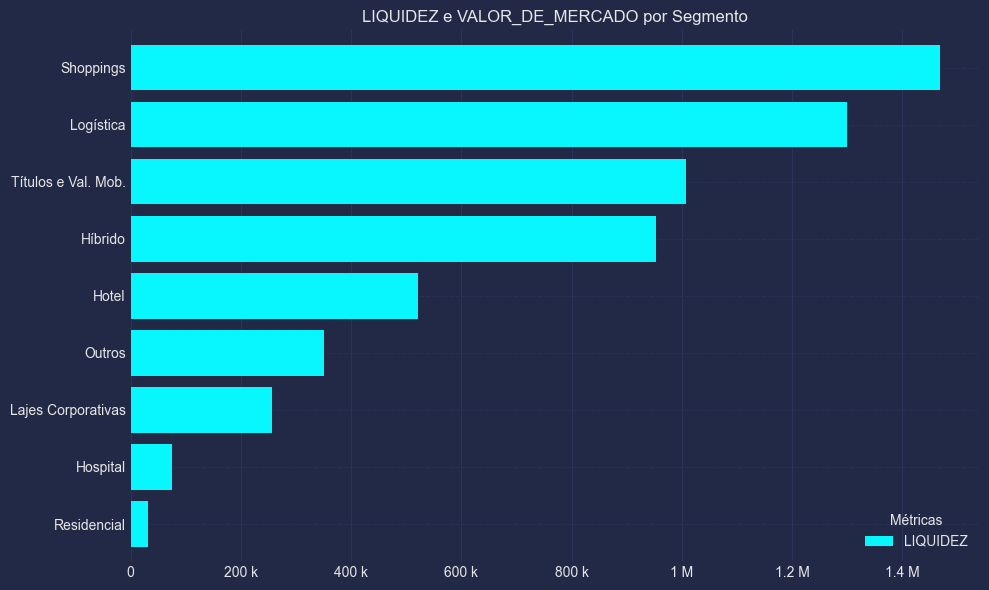

In [22]:
ax = df_indicadores['LIQUIDEZ'].sort_values().plot(kind='barh', figsize=(10, 6), width=0.8)
plt.title('LIQUIDEZ e VALOR_DE_MERCADO por Segmento')
formatter_eng = EngFormatter()
plt.gca().xaxis.set_major_formatter(formatter_eng)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Métricas')
plt.tight_layout()

# Exibir o gráfico
plt.show()

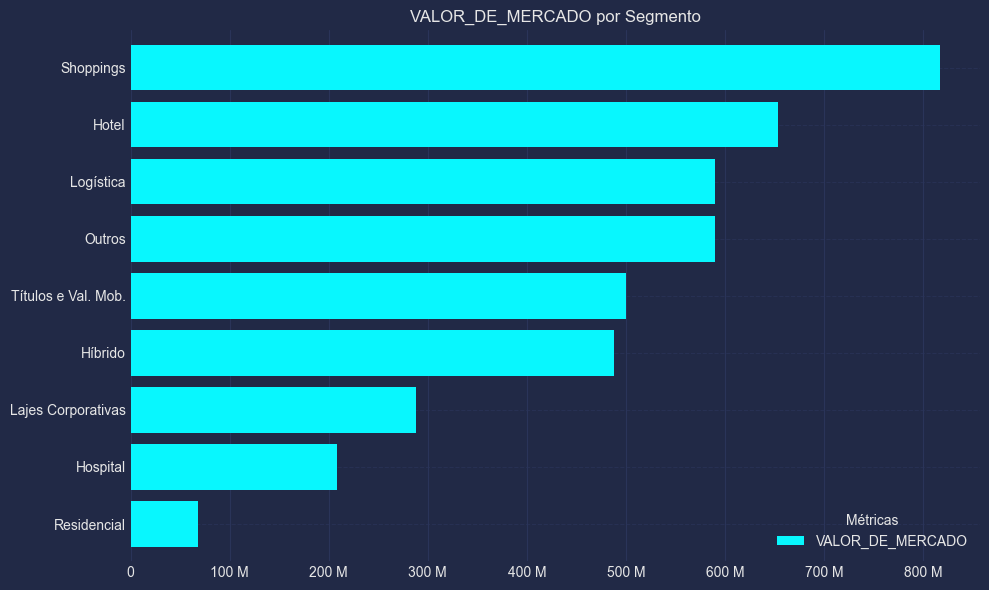

In [23]:
ax = df_indicadores['VALOR_DE_MERCADO'].sort_values().plot(kind='barh', figsize=(10, 6), width=0.8)
plt.title('VALOR_DE_MERCADO por Segmento')
formatter_eng = EngFormatter()
plt.gca().xaxis.set_major_formatter(formatter_eng)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Métricas')
plt.tight_layout()

# Exibir o gráfico
plt.show()

### Estatísticas descritivas do Preço/Valor Patrimonial

In [24]:
table['P_VP'].describe()

count    498.000000
mean       2.042008
std       21.823587
min        0.000000
25%        0.670000
50%        0.830000
75%        0.960000
max      486.340000
Name: P_VP, dtype: float64

In [25]:
# Calcular Q1 (25º percentil) e Q3 (75º percentil)

Q1_P_VP = table['P_VP'].quantile(0.25)
Q3_P_VP = table['P_VP'].quantile(0.75)

# Calcular IQR
IQR_P_VP = Q3_P_VP - Q1_P_VP

# Definir os limites inferior e superior
limite_inferior_p_vp = Q1_P_VP
limite_superior_p_vp = Q3_P_VP

# query valores sem outliers

query_pv_p = (table['P_VP'] >= limite_inferior_p_vp) & (table['P_VP'] <= limite_superior_p_vp)
                                             
# Tabela sem outliers

table[query_pv_p]['P_VP'].describe()

count    255.000000
mean       0.823216
std        0.082246
min        0.670000
25%        0.760000
50%        0.830000
75%        0.890000
max        0.960000
Name: P_VP, dtype: float64

### Estatísticas descritivas da Liquidez

In [26]:
# Calcular Q1 (25º percentil) e Q3 (75º percentil)

Q1_LIQUIDEZ = table['LIQUIDEZ'].quantile(0.25)
Q3_LIQUIDEZ = table['LIQUIDEZ'].quantile(0.75)

# Calcular IQR
IQR_LIQUIDEZ = Q3_LIQUIDEZ - Q1_LIQUIDEZ

# Definir os limites inferior e superior
limite_inferior_liquidez = Q1_LIQUIDEZ
limite_superior_liquidez = Q3_LIQUIDEZ

# query valores sem outliers

query_liquidez = (table['LIQUIDEZ'] >= limite_inferior_liquidez) & (table['LIQUIDEZ'] <= limite_superior_liquidez)
                                             
# Tabela sem outliers

table[query_liquidez]['LIQUIDEZ'].describe()

count       373.000000
mean      85477.152815
std      142613.641107
min           0.000000
25%           0.000000
50%        4551.000000
75%      113973.000000
max      560924.000000
Name: LIQUIDEZ, dtype: float64

### Estatísticas descritivas do Dividend Yield

In [27]:
# Calcular Q1 (25º percentil) e Q3 (75º percentil)

Q1_DY = table['DIVIDEND_YIELD'].quantile(0.25)
Q3_DY = table['DIVIDEND_YIELD'].quantile(0.75)

# Calcular IQR
IQR_DY = Q3_DY - Q1_DY

# Definir os limites inferior e superior
limite_inferior_dy= Q1_DY
limite_superior_dy = Q3_DY

# query valores sem outliers

query_dy = (table['DIVIDEND_YIELD'] >= limite_inferior_dy) & (table['DIVIDEND_YIELD'] <= limite_superior_dy)
                                             
# Tabela sem outliers

table[query_dy]['DIVIDEND_YIELD'].describe()

count    248.000000
mean       0.093077
std        0.036786
min        0.013800
25%        0.067375
50%        0.099000
75%        0.127300
max        0.143100
Name: DIVIDEND_YIELD, dtype: float64

In [28]:
table[query_pv_p & query_liquidez & query_dy][['P_VP', 'LIQUIDEZ','DIVIDEND_YIELD']].describe()

,P_VP,LIQUIDEZ,DIVIDEND_YIELD
count,84.000000,84.000000,84.000000
mean,0.839286,130639.750000,0.089105
std,0.084807,159528.235144,0.038815
min,0.670000,0.000000,0.013800
25%,0.777500,1987.250000,0.065100
50%,0.860000,37599.500000,0.092850
75%,0.910000,256406.750000,0.128100
max,0.960000,554940.000000,0.142100


[]

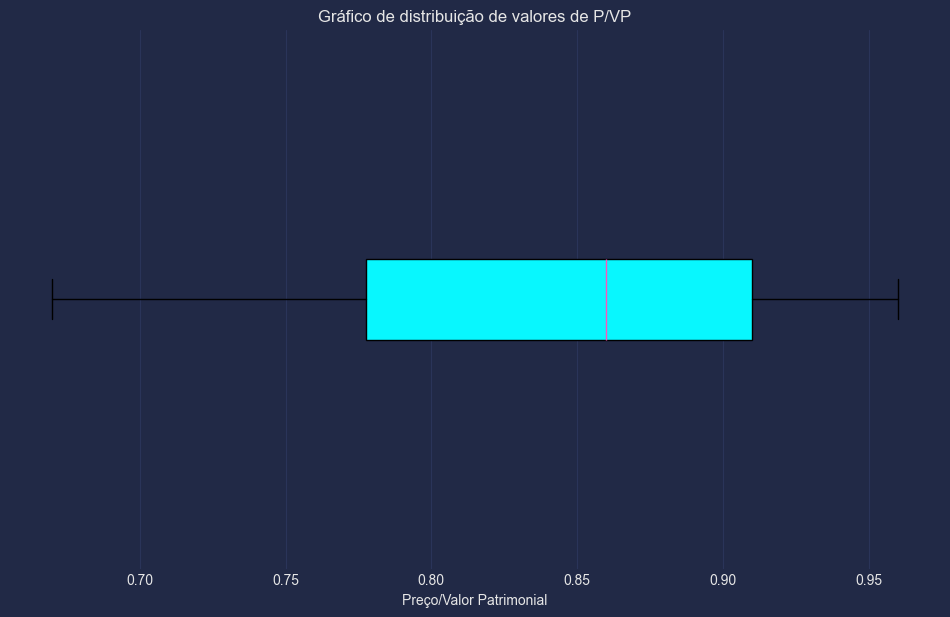

In [29]:
plt.figure(figsize=(12, 7))
plt.boxplot(table[query_pv_p & query_liquidez & query_dy]['P_VP'], patch_artist=True, notch=False, vert=False)
plt.title("Gráfico de distribuição de valores de P/VP")
plt.xlabel("Preço/Valor Patrimonial")
plt.gca().yaxis.set_ticks([])

# Mostrar gráfico

[]

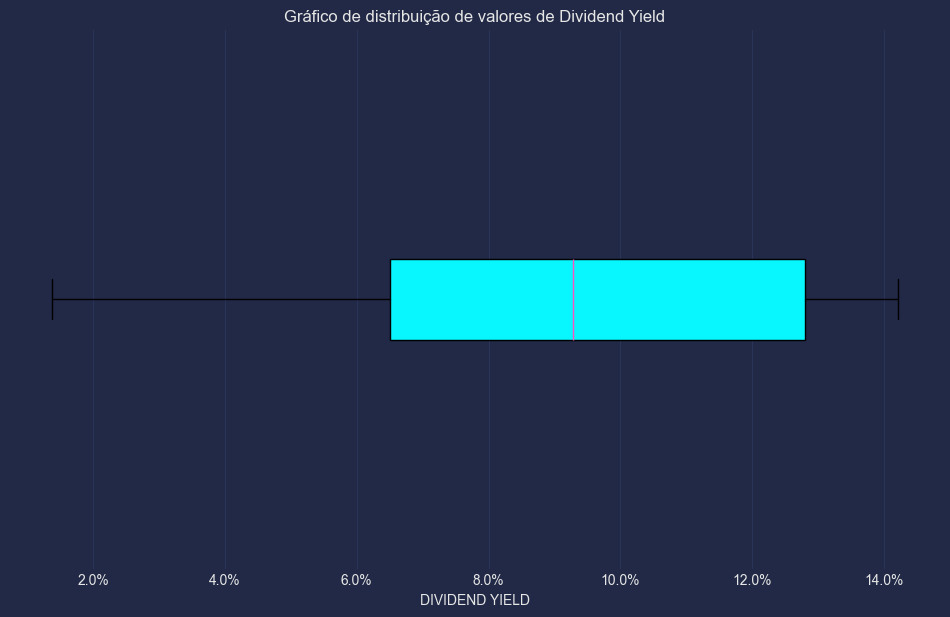

In [30]:
plt.figure(figsize=(12, 7))
plt.boxplot(table[query_pv_p & query_liquidez & query_dy]['DIVIDEND_YIELD'], patch_artist=True, notch=False, vert=False)
plt.title("Gráfico de distribuição de valores de Dividend Yield")
plt.xlabel("DIVIDEND YIELD")
formatter_percent = PercentFormatter(1)
plt.gca().xaxis.set_major_formatter(formatter_percent)
plt.gca().yaxis.set_ticks([])

# Mostrar gráfico

[]

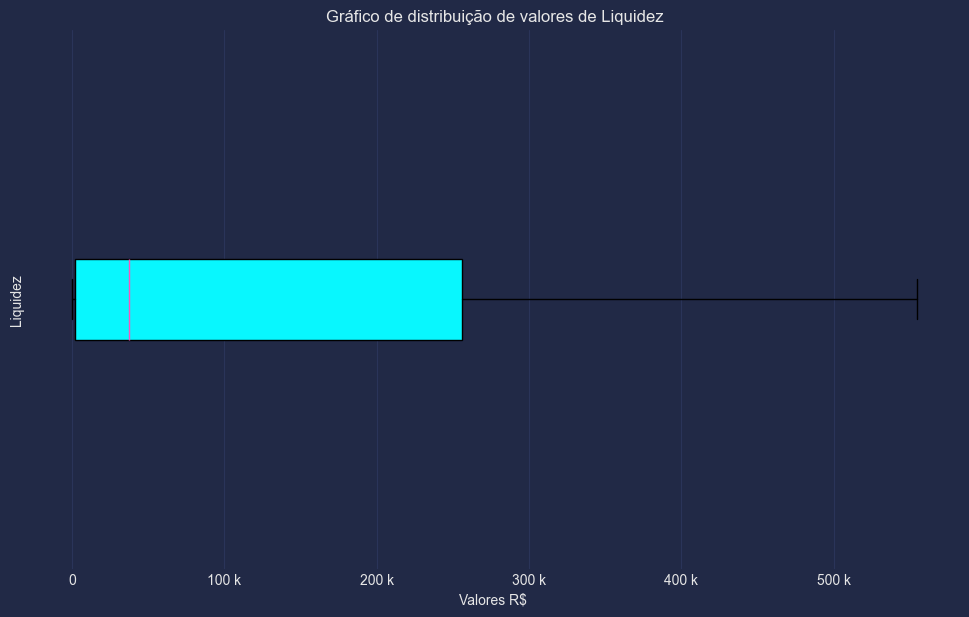

In [31]:
plt.figure(figsize=(12, 7))
plt.boxplot(table[query_pv_p & query_liquidez & query_dy]['LIQUIDEZ'], patch_artist=True, notch=False, vert=False)
formatter_eng = EngFormatter()
plt.title("Gráfico de distribuição de valores de Liquidez")
plt.xlabel("Valores R$ ")
plt.ylabel("Liquidez")
plt.gca().xaxis.set_major_formatter(formatter_eng)
plt.gca().yaxis.set_ticks([])


# Mostrar gráfico

In [32]:
table[query_pv_p & query_liquidez & query_dy].sort_values(by='DIVIDEND_YIELD', ascending=False).head(20)

,PAPEL,SEGMENTO,COTACAO,FFO_YIELD,DIVIDEND_YIELD,P_VP,VALOR_DE_MERCADO,LIQUIDEZ,QTD_DE_IMOVEIS,PRECO_DO_M2,ALUGUEL_POR_M2,CAP_RATE,VACANCIA_MEDIA
377,RFOF11,Títulos e Val. Mob.,59.94,0.1084,0.1421,0.89,64625200.0,512474.0,0,0.00,0.00,0.0000,0.0000
414,SNFF11,Títulos e Val. Mob.,72.40,0.0817,0.1413,0.91,245773000.0,356599.0,0,0.00,0.00,0.0000,0.0000
411,SNCI11,Títulos e Val. Mob.,81.26,0.1388,0.1406,0.85,341292000.0,533466.0,0,0.00,0.00,0.0000,0.0000
52,BPFF11,Outros,52.63,0.1990,0.1388,0.78,236431000.0,355398.0,0,0.00,0.00,0.0000,0.0000
33,BBRC11,Outros,94.87,0.1405,0.1380,0.90,150843000.0,150861.0,20,9225.60,1585.84,0.1719,0.0000
397,SAPI11,Títulos e Val. Mob.,7.48,0.1336,0.1367,0.78,115468000.0,387292.0,0,0.00,0.00,0.0000,0.0000
102,CXCI11,Títulos e Val. Mob.,65.50,0.1425,0.1366,0.82,134781000.0,166797.0,0,0.00,0.00,0.0000,0.0000
480,WSEC11,Títulos e Val. Mob.,7.61,0.1429,0.1365,0.75,18694000.0,6298.0,0,0.00,0.00,0.0000,0.0000
29,BBFO11,Títulos e Val. Mob.,56.55,0.2082,0.1363,0.79,226421000.0,369683.0,0,0.00,0.00,0.0000,0.0000
16,APTO11,Híbrido,8.64,0.1261,0.1350,0.89,39849600.0,18693.0,4,15058.70,1091.99,0.0725,0.0000
